# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import median , gaussian
from skimage.color import rgb2gray,rgb2hsv,rgba2rgb

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [4]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

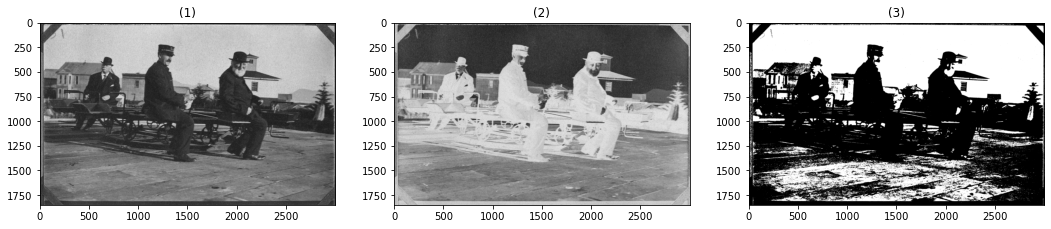

In [5]:
'''
1
Negative Transformation
'''
#QUESTION1==> Define function ‘Negative’ that apply Negative transformation for any image and any threshold. What is the equation???
def negativeTransformation ( img ):
    img = 1 - (float)(1/ 256)- img 
    return img

def brightnessTransformation ( img , threshold):
    img5 = np.copy(img)
    img5[(img5>=threshold)] = 1
    img5[(img5<threshold)] = 0 
    return img5

img = io.imread('1.jpg')
img2 = rgb2gray(img)
img3 = negativeTransformation(img2)

threshold=0.5
img4 = brightnessTransformation(img2 , threshold)
#print (img2)
#print (img3)
images = [img2 , img3, img4]
show_images(images)

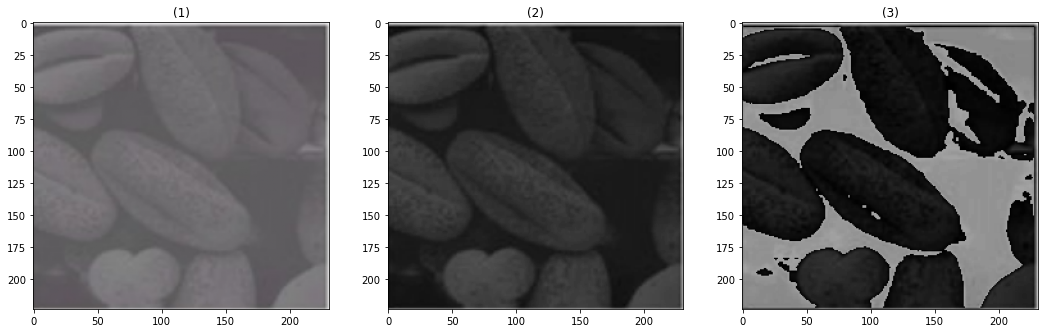

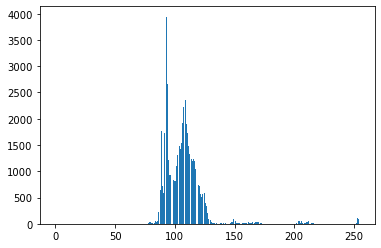

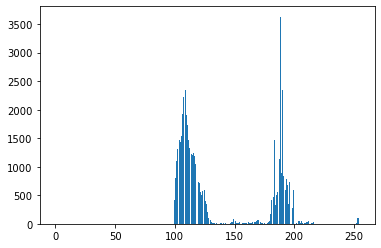

In [6]:
'''
2
Contrast Enhancement
'''
# stretch or compress the distribution of the density of a SPECIFIC range of pixels
#human can differentiate between details == Computer already differentiate between them 
def contrastEnhancement(img ):
    img5 = np.copy(img)
    img5 = img5 * 255
# for that eq (1.5 * value + 50) , we mapped the zero value to 50 and the 100 value to 200
    img5[img5 < 100] = (1.5 * img5[img5 < 100])+50
    img5 = img5 / 255
    return img5

img = rgba2rgb(io.imread('tr.png'))
img2 = rgb2gray(img)
img3 = contrastEnhancement(img2)
images = [img ,img2 ,  img3]
#print(img2)
#print(img3)
show_images(images)

histogram2, bin_edges2 = np.histogram(img2, bins=256, range=(0, 1))
bin_edges22 = bin_edges2[0:256]
hist2 = [histogram2,bin_edges22]
showHist(None ,hist2 )


histogram3, bin_edges3 = np.histogram(img3, bins=256, range=(0, 1))
bin_edges33 = bin_edges3[0:256]
hist3 = [histogram3,bin_edges33]
showHist(None ,hist3 )


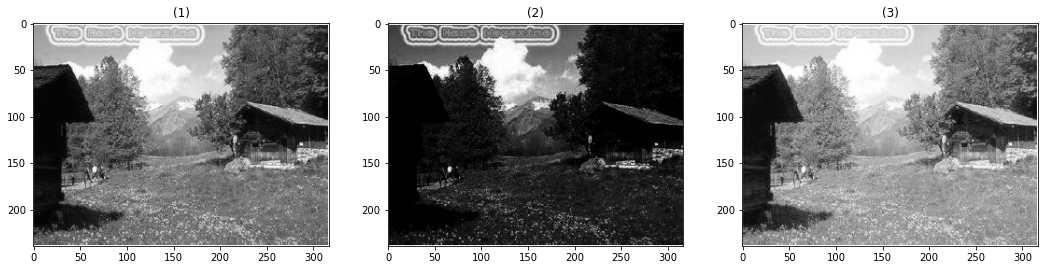

In [7]:
'''
3
Gamma Correction
'''
def gammaCorrection(img , c , gamma):
    img3 = np.copy(img)
    img3= (img3**gamma) * c
    return img3

img = rgb2gray(io.imread('2.jpg'))
c=1
gamma=3
img2 = gammaCorrection(img , c , gamma)
gamma2=0.5
img3 = gammaCorrection(img , c , gamma2)
# decreaing gamma lead to lighter and vice versa

images = [img ,img2 , img3]
show_images(images)

(1850, 3000)


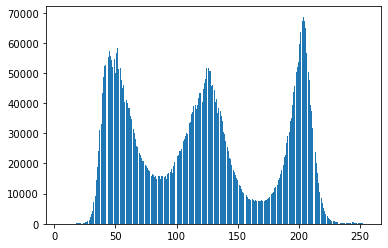

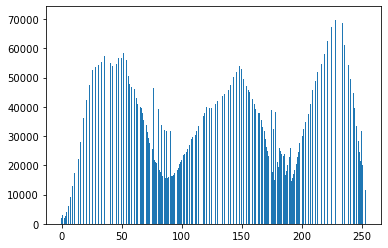

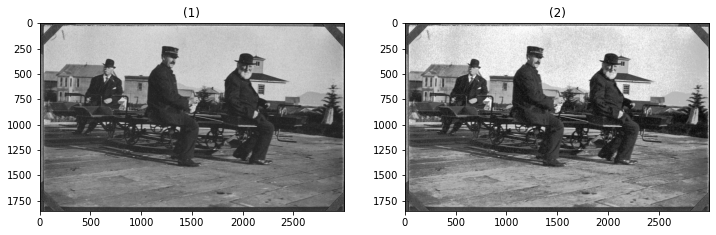

[[239. 248. 250. ... 244. 248. 241.]
 [252. 241. 244. ... 243. 238. 250.]
 [237. 196. 190. ...  42.  56. 241.]
 ...
 [243. 107. 115. ... 103.  98. 244.]
 [241. 119.  96. ... 117. 137. 248.]
 [248. 235. 248. ... 244. 238. 252.]]


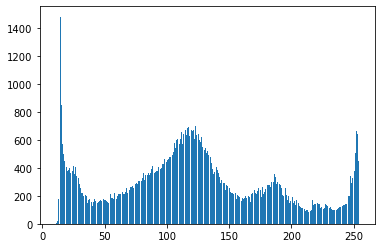

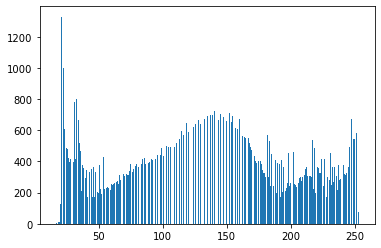

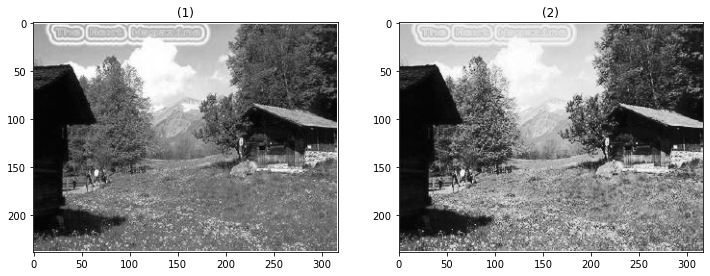

In [10]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
#def getImageWithHist(name,ext,nbins=256):   
#    pass
#for i in range(1, len(histogram2)):
    #    histogram2[i] += histogram2[i-1]
# Histogram Equalization : Stretches the distribution of values 


# stretch or compress the distribution of the density of ALL the range of pixels
def histogramEqualization(img_grayscale ):
    #print(img_grayscale)
    img_grayscale_255_range = img_grayscale*255
    maxIntensity= np.amax(img_grayscale_255_range)
   
    N = img_grayscale.shape[0]
    M = img_grayscale.shape[1]
    size = N*M    
    
    histogram2, bin_edges2 = np.histogram(img_grayscale, bins=256)
    bin_edges22 = bin_edges2[0:256]
    hist2 = [histogram2,bin_edges22]
    showHist(None ,hist2 )

    #cumulative sum
    histogram2=np.cumsum(histogram2)
    
    #Question3 ==> how to make it in one line??
    # We converted the values of the array from float to integer (unit8)
    img_Eq =np.round((maxIntensity-1)*(histogram2[img_grayscale_255_range.astype('uint8')]/float(size)))
    histogram3, bin_edges3 = np.histogram(img_Eq/255.0, bins=256)
    bin_edges33 = bin_edges3[0:256]
    hist3 = [histogram3,bin_edges33]
    showHist(None ,hist3 )
    #print(img_Eq)
    return img_Eq
    
img = io.imread('1.jpg')
img_grayscale = rgb2gray(np.copy(img)) 
print(img_grayscale.shape)
img_result = histogramEqualization(img_grayscale)
show_images([rgb2gray(np.copy(img)),img_result ])

img = io.imread('2.jpg')
img_grayscale = rgb2gray(np.copy(img)) 
img_result = histogramEqualization(img_grayscale)
print (img_result)
show_images([rgb2gray(np.copy(img)),img_result ])


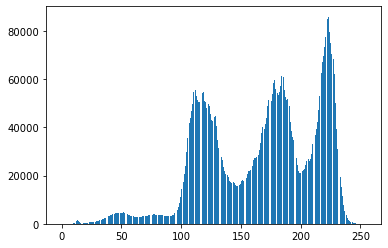

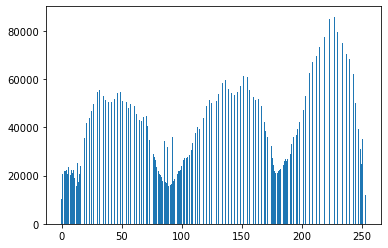

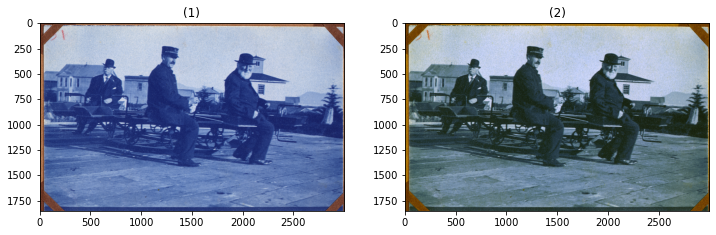

In [9]:
img = io.imread('1.jpg')
img2 = np.copy(img)

img[:,:,2] = histogramEqualization(img[:,:,2].astype('float64')/255)
show_images([img2,img ])